## 독립동일분포

#### 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수
#### 예 )
1. 400명의 평균 점수를 알기 위하여 20명에게 설문
2. 각각의 인원들은, 그 전에 만났던 인원과 전혀 관계 없이 만난 인원 (랜덤)
3. 20명의 점수 ($X_1, X_2, ..., X_20)$은 서로 독립인 20차원의 확률변수

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

#### 그래프의 선의 종류

In [14]:
linestyles = ['-', '--', ':']

#### 2차원 이산형 확률분포의 기댓값과 공분산에 대한 함수

In [15]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [16]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

#### X와 Y의 주변확률함수

In [17]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

### 
## 독립성 
- **2개 이상의 확률변수가 서로 영향을 끼치지 않으며, 관계가 없음**
- **확률변수가 독립일 때 결합확률은 주변확률의 곲으로 작성**

### 독립성의 정의 : n개의 확률변수가 $X_1, X_2, ..., X_n$이 다음을 만족할 때, $X_1, X_2, ..., X_n$은 서로 독립

### $f_{X_1, X_2, ..., X_n} (x_1, x_2, ..., x_n) = f_{X_1}(x_2) \; f_{X_2}(x_2)...\; f_{X_n}(x_n)$

### 
### 독립성과 무상관성
- 독립성이 무상관성보다 더 큰 개념
- **2개의 확률변수 X와 Y가 독립일 때, X와 Y는 무상관이 되지만, X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님**

In [19]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

In [20]:
def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0

In [21]:
XY = [x_set, y_set, f_XY]

- X와 Y는 독립이므로 무상관 => **공분산 = 0**

In [22]:
Cov(XY)

-0.000

#### 
#### 무상관인데 독립이 아닌 경우

#### $f_{XY}(x, y) = $

$\begin{cases}
{1 \over 3} \;\; (x, y) \in \{(0, 0), (1, 1), (1, -1)\}\\
0 \;\; (otherwise)
\end{cases}$

In [8]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

In [9]:
def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0

In [10]:
XY = [x_set, y_set, f_XY]

In [11]:
Cov(XY)

0.000

In [18]:
f_X(0) * f_Y(0), f_XY(0, 0)

(0.111, 0.333)

### 
## 합의 분포
#### $\sum_{i=1}^n X_i = X_1 + X_2 + ... + X_n$이 따르는 확률분포

#### 
### 확률변수 합의 기댓값

### $E(X_1 + X_2 + ... X_n) = E(X_1) + E(X_2) +... E(X_n)$

### 
### 확률변수 $X_1, X_2, ..., X_n$가 서로 독립이라면
### $V(X_1 + X_2 + ... X_n) = V(X_1) + V(X_2) +... V(X_n)$

### 
### 재생성 : 동일한 분포를 따르는 2개의 독립인 확류변수에 대해서, 그 합도 동일한 확률분포가 되는 성질

### 정규분포 합의 분포
#### 서로 독립인 확률변수 $X_1 \sim N(\mu_1, \sigma^2_1), X_2 \sim N(\mu_2, \sigma^2_2), ... X_n \sim N(\mu_n, \sigma^2_n)$에 대해

### $\sum_{i=1}^n X_i \sim N(\sum^n_{i=1}\mu_i, \;\; \sum^n_{i=1}\sigma^2_i)$

### 
#### **$X \sim N(1, 2), \;\; Y \sim N(2, 3)$**일 때, 확률변수 $X+Y$의 분포
#### $E(X+Y) = E(X) + E(Y) = 1 + 2 = 3, \;\;\;\;\;\; V(X+Y) = V(X) + V(Y) = 2 + 3 = 5$

In [29]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

In [30]:
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
X_sample.shape, Y_sample.shape

((1000000,), (1000000,))

In [31]:
sum_sample = X_sample + Y_sample
sum_sample.shape

(1000000,)

In [32]:
np.mean(sum_sample), np.var(sum_sample)

(3.000, 4.997)

### 
#### $(X+Y)$로부터 무작위추출한 표본 데이터의 히스토그램과 밀도함수

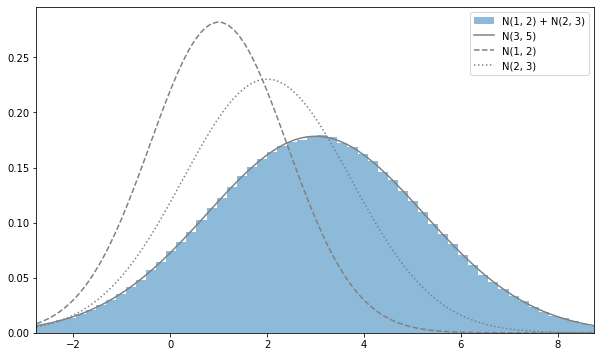

In [33]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins = 100, density = True,
        alpha = 0.5, label = 'N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label = 'N(3, 5)', color = 'gray')
ax.plot(xs, rv1.pdf(xs), label = 'N(1, 2)', ls = '--', color = 'gray')
ax.plot(xs, rv2.pdf(xs), label = 'N(2, 3)', ls=':', color = 'gray' )

ax.legend()

ax.set_xlim(rv.isf(0.995), rv.isf(0.005))

plt.show()

- **$(X + Y) \sim N(3, 5)$임을 확인**

### 
### 포아송 분포의 합의 분포
#### 서로 독립인 확률변수 $X_1 \sim Poi(\lambda_1), \;\; X_2 \sim Poi(\lambda_2), \;\; ... \;\; X_n \sim Poi(\lambda_n)$에 대해

### $\sum_{i=1}^n X_i \sim Poi(\sum^n_{i=1}\lambda_i)$

### 
#### **$X \sim Poi(3), \;\; Y \sim Poi(4)$**일 때, 확률변수 $X+Y$의 분포
#### $E(X+Y) = E(X) + E(Y) =  3+4 =7, \;\;\;\;\;\; V(X+Y) = V(X) + V(Y) = 3 + 4 = 7$

In [38]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

In [39]:
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
X_sample.shape, Y_sample.shape

((1000000,), (1000000,))

In [40]:
sum_sample = X_sample + Y_sample
sum_sample.shape

(1000000,)

In [41]:
np.mean(sum_sample), np.var(sum_sample)

(6.995, 7.010)

### 
#### $(X+Y)$로부터 무작위추출한 표본 데이터의 히스토그램과 확률함수

C:\Users\이찬솔\AppData\Local\Temp\ipykernel_16824\1084158929.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins = 20,


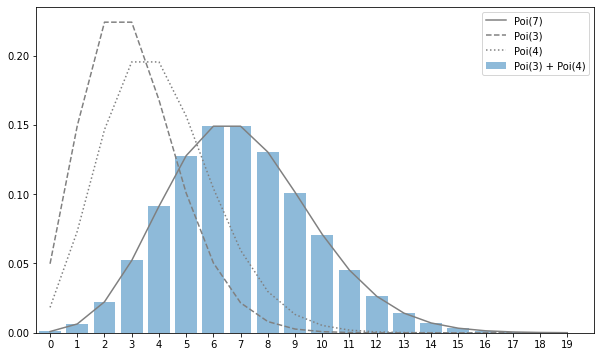

In [42]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)

hist, _ = np.histogram(sum_sample, bins = 20,
                       range = (0, 20), normed = True)

ax.bar(xs, hist, alpha = 0.5, label = 'Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label = 'Poi(7)',  color = 'gray')
ax.plot(xs, rv1.pmf(xs), label = 'Poi(3)', ls = '--', color = 'gray')
ax.plot(xs, rv2.pmf(xs), label = 'Poi(4)', ls = ':',  color = 'gray')

ax.legend()

ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))

plt.show()

- **$(X + Y) \sim Poi(7)$임을 확인**

### 
### 베르누이 분포의 합의 분포
#### 서로 독립인 확률변수 $X_1, X_2, ..., X_n ~ Bern(p)$에 대해

### $\sum_{i=1}^n X_i \sim Bin(n, p)$

## 
- **서로 독립인 확률변수 $X_1, X_2, ..., X_n ~ Bern(p)$일 떄, $Bern(p)$의 기댓값은 $p$, 분산은 $p(1-p)$**
- **$\sum_{i=1}^n X_i$**의 기댓값은 $10 \times 0.3 = 3$, 분산은 $10 \times 0.3 \times 0.7 = 2.1$


In [43]:
p = 0.3
rv = stats.bernoulli(p)

In [44]:
sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.998, 2.098)

### 
### 베르누이 분포의 합은 이항분포
#### 베르누이 분포에는 재생성이 없음

#### $\sum_{i=1}^10 X_i$의 히스토그램과 확률함수

C:\Users\이찬솔\AppData\Local\Temp\ipykernel_16824\1275147382.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins = 10,


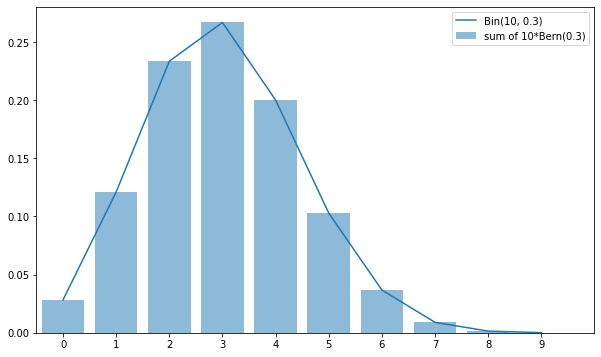

In [45]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)

hist, _ = np.histogram(sum_sample, bins = 10,
                       range = (0, 10), normed = True)
ax.bar(xs, hist, alpha = 0.5, label = 'sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')

ax.legend()

ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))

plt.show()

- **$\sum_{i=1}^10 X_i \sim Bin(10, 0.3)$**이 됨을 확인

## 
## 표본평균의 분포

### 표본평균의 기댓값과 분산
#### 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고, 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포 F를 따를 때

### $E(\bar{X}) = \mu \;\;\;\;\; V(\bar{X}) = {\sigma^2 \over n}$ 

### 

### $E(\bar{X}) = E({{X_1 + X_2 + ... + X_n} \over n})= {{E(X_1+ E(X_2) +... +  E(X_n)} \over n} = {{n\mu} \over n} = \mu$

### $V(\bar{X}) = V({{X_1 + X_2 + ... + X_n} \over n})= {{V(X_1+ V(X_2) +... +  V(X_n)} \over {n^2}} = {{n\sigma^2} \over {n^2}} = {\sigma^2 \over n}$

### 
### 정규분포의 표본평균 분포

### $\bar{X} \sim N(\mu, {\sigma^2 \over n})$

#### 
#### $n = 10, \;\;\;\; X_1, X_2, ..., X_{10} \sim N(1, 2)$
#### $E(\bar(X)) = 1, \;\;\;\;\; V(\bar{X}) = 2 / 10$

In [46]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

In [47]:
n = 10
sample_size = int(1e6)

Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)
Xs_sample.shape, sample_mean.shape

((10, 1000000), (1000000,))

In [48]:
np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.200)

#### $\bar{X} \sim N(1, {2 \over 10}$의 무작위추출 표본 히스토그램과 밀도함수

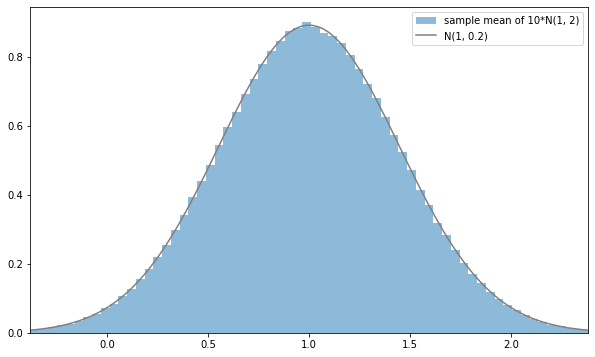

In [49]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var / n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

ax.hist(sample_mean, bins = 100, density = True,
        alpha = 0.5, label = 'sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label = 'N(1, 0.2)', color = 'gray')

ax.legend()

ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))

plt.show()

### 
### 포아송분포의 표본평균 분포
#### $\bar{X}$의 분포는 포아송 분포를 따르지 않음
- **재생성이 있는 포아송 분포에서도 표본평균에 대해서는 포아송 분포를 유지할 수 없음**

#### 
#### $n = 10, \;\;\;\; X_1, X_2, ..., X_{10} \sim Poi(3)$
#### $E(\bar(X)) = 3, \;\;\;\;\; V(\bar{X}) = 3 / 10$

In [52]:
l = 3
rv = stats.poisson(l)

In [55]:
n = 10
sample_size = int(1e6)

Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)
Xs_sample.shape, sample_mean.shape

((10, 1000000), (1000000,))

In [56]:
np.mean(sample_mean), np.var(sample_mean)

(3.000, 0.301)

- **기댓값과 분산이 다르다는 것을 확인**

#### 무작위추출 표본 히스토그램과 밀도함수

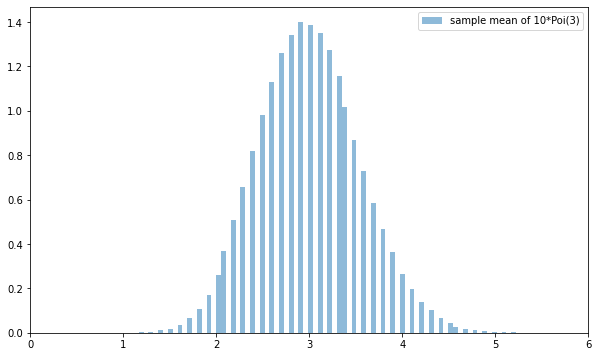

In [57]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins = 100, density = True,
        alpha = 0.5, label = 'sample mean of 10*Poi(3)')

ax.legend()

ax.set_xlim(0, 6)

plt.show()

### 
## 중심극한정리 (CLT)
### 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고, 기댓값이 $\mu$, 분산이 $\sigma^2$인 확률분포 F를 따를 때, n이 커짐에 따라 표본평균 $\bar{X}$의 분포는 정규분포 $N(\mu, {\sigma^2 \over n})$에 근사함
- **원래 분포가 뭐였든 간, 표본평균의 분포는 정규분포에 가까워짐**
### 

### $n = 10000, \;\;\; X_1, X_2, ..., X_{10000} \sim Poi(3)$라고 할 때, 표본평균의 계산을 10000번 수행  
- (포아송 분포로부터의 무작위추출은 10000 X 10000번)

### 중심극한정리에 의해, $\bar{X} \sim N(3, {3 \over 10000})$

In [58]:
l = 3
rv = stats.poisson(l)

In [59]:
n = 10000
sample_size = 10000

Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis = 0)
Xs_sample.shape, sample_mean.shape

((10000, 10000), (10000,))

In [60]:
rv_true = stats.norm(l, np.sqrt(l / n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

#### $\bar{X}$의 표본 히스토그램과 $N(3, {3 \over 10000})$의 밀도함수 **=> 정규분포에 가까워짐**

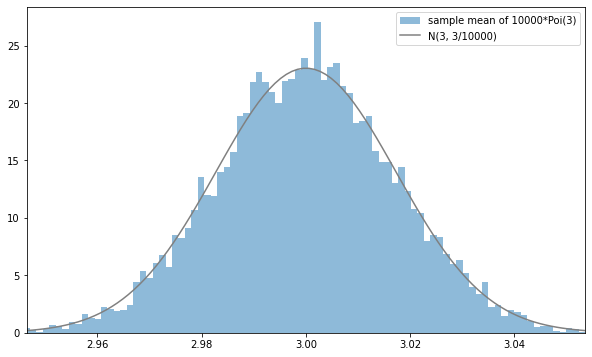

In [62]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins = 100, density = True,
        alpha = 0.5, label = 'sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label = 'N(3, 3/10000)', color = 'gray')

ax.legend()

ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))

plt.show()

### 
## 대수의 법칙
### 확률변수 $X_1, X_2, ..., X_n$이 서로 독립이고, 기댓값이 $\mu$, 분산이 $\sigma^2$일 것 같은 확률분포 따를 때, n이 커짐에 따라 표본평균은 $\mu$에 수렴
- **원래 분포가 뭐였든 간, 표본평균의 분포는 정규분포에 가까워짐**
### 

#### 한번의 시행이 $Bern({1 \over 6})$을 따를때, 표본 크기가 커짐에 다라 표본평균은 ${1 \over 6}$에 수렴할 것
=> **표본크기가 10만인 무작위추출을 4번**

In [63]:
p = 1 / 6
rv = stats.bernoulli(p)

In [67]:
n = int(1e5)

sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
sample.shape, space.shape

((100000, 4), (50,))

In [72]:
plot_list = np.array([np.mean(sample[:sp], axis = 0)
                      for sp in space]).T
plot_list.shape, plot_list

((4, 50),
 array([[0.12 , 0.161, 0.164, 0.168, 0.167, 0.168, 0.165, 0.165, 0.165,
         0.166, 0.165, 0.166, 0.166, 0.166, 0.166, 0.167, 0.168, 0.168,
         0.168, 0.169, 0.169, 0.169, 0.169, 0.169, 0.169, 0.169, 0.17 ,
         0.17 , 0.169, 0.169, 0.169, 0.169, 0.17 , 0.169, 0.169, 0.169,
         0.169, 0.169, 0.169, 0.168, 0.169, 0.168, 0.168, 0.169, 0.169,
         0.169, 0.169, 0.169, 0.169, 0.169],
        [0.14 , 0.157, 0.161, 0.164, 0.163, 0.163, 0.165, 0.166, 0.165,
         0.163, 0.164, 0.165, 0.165, 0.166, 0.166, 0.167, 0.167, 0.166,
         0.167, 0.167, 0.167, 0.167, 0.167, 0.167, 0.166, 0.166, 0.167,
         0.167, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166,
         0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.166, 0.167, 0.167,
         0.167, 0.167, 0.167, 0.167, 0.167],
        [0.15 , 0.152, 0.164, 0.167, 0.167, 0.167, 0.167, 0.167, 0.168,
         0.169, 0.167, 0.167, 0.167, 0.167, 0.167, 0.166, 0.168, 0.168,
         0.168, 0.167, 0.167, 0.168,

#### 4번의 각각의 무작위추출에서 표본평균으로 사용하는 표본크기를 점차적으로 증가시킬 때, 표본평균의 변화

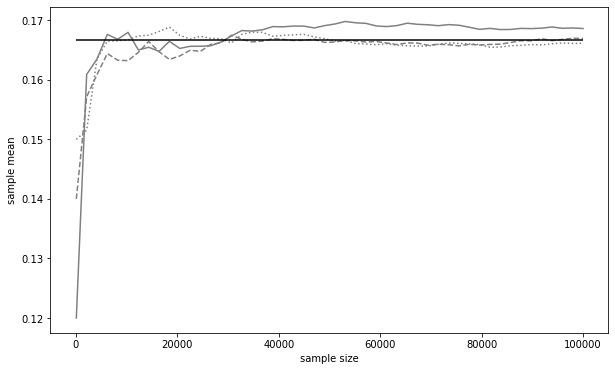

In [69]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls = ls, color = 'gray')
ax.hlines(p, -1, n, 'k')

ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()

- **표본크기가 작을 때는 변동이 있지만, 표본크기가 커지면서 ${1 \over 6}$에 가까워짐**